# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import time
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
# read csv file ab_data
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# show number of rows
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [4]:
# display number of unique users
df["user_id"].nunique()

290584

**d.** The proportion of users converted.

In [5]:
#The proportion of users converted.
df[df["converted"]==1]["user_id"].nunique()/df["user_id"].nunique()

0.12104245244060237

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
df.query(' group == "treatment" & landing_page != "new_page"').shape[0]

1965

**f.** Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2ddf.drop(df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")].index, inplace=True) 
df1 = df.drop(df[(df["group"] == "control") & (df["landing_page"] == "new_page")].index)
df2 = df1.drop(df1[(df1["group"] == "treatment") & (df1["landing_page"] == "old_page")].index)


In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
df2["user_id"].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated("user_id")].user_id

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
df2[df2["user_id"] == 773192] 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id..
# Check again if the row with a duplicate user_id is deleted or not
df2.drop(index = (1899), inplace = True)
df2[df2["user_id"] == 773192] 

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [14]:
P_conv = df2[df2["converted"] == 1].shape[0]/df2.shape[0]
P_conv

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
P_conv_and_control = df2[(df2["converted"] == 1) & (df2["group"] =="control")].shape[0]/df2.shape[0]
P_control = df[df["group"]=="control"]. shape[0]/df.shape[0]
P_conv_given_control = P_conv_and_control/P_control
P_conv_given_control

0.1204016460128613

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
P_conv_and_treatment = df2[(df2["converted"] == 1) & (df2["group"] =="treatment")].shape[0]/df2.shape[0]
P_treatment = df[df["group"]=="treatment"].shape[0]/df.shape[0]
P_conv_given_treatment = P_conv_and_treatment/P_treatment
P_conv_given_treatment

0.11879293273409655

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff= df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
P_new_page = df[df["landing_page"]=="new_page"].shape[0]/df.shape[0]
P_new_page

0.5

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

<span style="color:red;">
    we noticed from (a) that the conversion rate from all equals 0.1195, this proportion is very close to the conversion rates from (new page) and (old page), so we couldn't decide which one is better before hypothesis testing, and conversion rate for the old page is slightly higher than the conversion rate for the new page </span>

<a id='ab_test'></a>
## Part II - A/B Test




### ToDo 2.1


Because I'm testing whether the new page is better than the old page, I putted the proportion difference between new page and old page that greater than 0 as an alternative hypothesis, then I but I putted the null hypothesis is opposite of that. this null hypothesis means that new page is not better. 
>$$ H_0 : p_{new} - p_{old} \leq 0 $$     

>$$ H_1 : p_{new} - p_{old} > 0 $$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
I will test the null hypothesis, for that we put :<br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>



**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
p_new = df2[df2["converted"] == 1].shape[0]/df2.shape[0]
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
p_old = df2[df2["converted"] == 1].shape[0]/df2.shape[0]
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [21]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2.query('group== "control"').shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [23]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
(new_page_converted-old_page_converted).mean() 

-9.6154462153853626e-06


**h. Sampling distribution** <br>


In [26]:
# Sampling distribution 
start_time = time.time()
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
print(f"execution time is {time.time()-start_time} seconds")
 

execution time is 0.005115985870361328 seconds


Text(0.5,1,'bootstrap distribution for p_diffs')

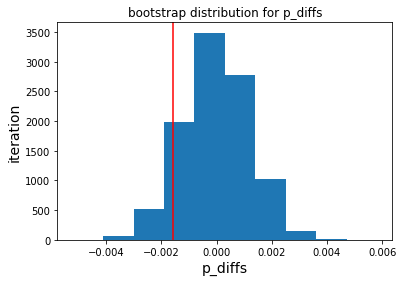

In [27]:
#histogram for the bootstrap distribution of p_diff
plt.hist(p_diffs)
plt.axvline(x=obs_diff,color ="red") 
plt.xlabel('p_diffs',size='14')
plt.ylabel('iteration',size='14')
plt.title('bootstrap distribution for p_diffs')

>**yes _ this histogram is like the normal distribution, with mean equals 0**
> _ I can that the observed difference between proportion less than zero. 

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
(p_diffs > obs_diff).mean() 

0.9042

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? 

>**this is p_value, it's the space under the probability distribution to compare the probability observed value, it describes whether the probability of the values to be greater than the observed value, if the alternative hypothesis has (>) sign. or the probability of the values to be less than the observed value, if the alternative hypothesis has (<) sign**

>**the p_value equals 0.9 this is greater than Type 1 error rate (0.05), so we failed to reject the null hypothesis**



**l. Using Built-in Methods for Hypothesis Testing**<br>



In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[(df2["converted"] == 1) & (df2["group"] =="control")].shape[0]

# number of conversions with the new_page
convert_new = df2[(df2["converted"] == 1) & (df2["group"] =="treatment")].shape[0]

# number of individuals who were shown the old_page
n_old = df2.query('group== "control"').shape[0] 

# number of individuals who received new_page
n_new = df2.query('group== "treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
import statsmodels.api as sm
# z test with statsmodels
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old] ,[n_new, n_old],alternative="larger" )
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



> **this test is right tailed p-value, because the alternative hypothesis includes > sign**
> ***we can see that the z-score equals -1.3 this is smaller than $Z_{0.05}$ that equals 1.645 so we fail to reject the null hypothesis***

> ***see p_value is similar to the one computed earlier in part j it's about 0.9***

> ***p_value from this test equals 0.9 that is greater than 0.05 then I fails to reject the null hypothesis***
> **so this test agrees with the test is done earlier**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**logistic regression**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:

In [31]:
#Create the intercept culomn for the model
df2["intercept"] = 1
#Create dummies for group when it equals treatment 
df2["ab_page"] = df2['group'].replace({'treatment': 1, 'control': 0}) 
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


#### Create logistic model for conversion and the new page generally  

In [32]:

log_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']]) 
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
#the summary of results
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-01-22 23:48 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [34]:
# to exponentiate
np.exp(-0.0150)

0.98511193960306265

In [35]:
1/np.exp(-0.0150)

1.0151130646157189

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


>**the Hypothesis of regression**
>$$ H_0 : p_{new} - p_{old} = 0 $$     

$$ H_1 : p_{new} - p_{old} \neq 0 $$
> - **the p-value of ab_page (new page visitors) equals 0.1899**
  - **so we fails to reject the null hypothesis.**

> - **in part 2: hypothesis was the difference between the proportion of the new and old page, all are compared to 0**

> - **so in part 2 p-value is on the right edge of the probability distribution.** 

> - **in regression : hypothesis of coefficients equals or not equals 0**

> - **so in regression p-value is divided by 2 and is on the two edges of the probability distribution.**

> - **the p-value of intercept < (0.05), this means the intercept is significant, the p-value of ab_page > (0.05) so we failed reject null hypothesis**
> - **this means the relationship between the conversion rate and the new page is not significant.** 

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**the more we add an influenced the more we can interpret how changes that happen to the dependent variable in us model**

>**there is a disadvantage when we add more factors, it may be a relationship between two or more factors, this is called multicollinearity, this problem is very dangerous for forming an accurate model.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

In [36]:
# Read the countries.csv
df4 = pd.read_csv("countries.csv")
df4.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:
# Join with the df2 dataframe
df5 = df2.join(df4.set_index('user_id'), on = "user_id") 
df5.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [38]:
# Create the necessary dummy variables
df5[['CA' , 'UK' , 'US']] = pd.get_dummies(df5['country'])
df5 = df5.drop('CA',axis= 1)
df5['ab_UK'] = df5['ab_page'] * df5['UK']
df5['ab_US'] = df5['ab_page'] * df5['US']
df5.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,ab_UK,ab_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0


**h. Fit your model and obtain the results**<br> 

#### test the interaction between conversion rate and the new page and the country


In [39]:
# Fit your model, and summarize the results, 
# test the interaction between conversion rate and the country
df5['intercept'] = 1
log_mod_country = sm.Logit(df5['converted'], df5[['intercept', 'ab_UK', 'ab_US']] ) 
results = log_mod_country.fit()
results.summary2() 

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-01-22 23:48 AIC:              212781.7674
No. Observations:   290584           BIC:              212813.5064
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9926    0.0079  -252.9104  0.0000  -2.0081  -1.9772
ab_UK         0.0112    0.0179     0.6256  0.5316  -0.0240   0.0464
ab_US        -0.0144    0.0125    -1.1548  0.2482  -0.0389   0.0101
==================================================================

"""

In [40]:
#to exponentiate
np.exp(0.0112), 1/np.exp(-0.0144) 

(1.0112629548117711, 1.0145041794607625)

> - **the p-value of intercept < (0.05), this mean the intercept is significant.**
- **the p-value of ab_US variable equals 0.2482 > (0.05) so we fail reject null hypothesis**
- **then p-value of ab_UK variable equals 0.5316 > (0.05) so we fail reject null hypothesis**
>**the interpretation of Coefficients although p-value says that can't predict with this regression** :
   >> - for 1 unit decrease in ab_page (the new page visitors), number of conversions decrease 1.015 times as likely. By constant else factors
   >> - for 1 unit decrease in ab_US (the new page visitors), number of conversions decrease 1.014 times as likely. By constant else factors
   
>> - for 1 unit increase in the ab_UK (the visitors from the United States), a number of conversions increase 1.011 times as likely. By constant else factors
### from parts 2 and 3, I advice to keep the old webpage then develope it, because the new page doesn't have the tangible effect on the conversion rate, and there is not advantage for any country for the new page. 

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0